# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Applying Multinomial Naive Bayes

## [5.1] Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [38]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math

## [4.1] BAG OF WORDS

In [39]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
X_tr_bow= count_vect.fit_transform(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print(len(count_vect.get_feature_names()))
print('='*50)
print("the type of count vectorizer ",type(X_tr_bow))
print("the shape of out text BOW vectorizer ",X_tr_bow.get_shape())

x_ts_bow = count_vect.transform(x_test)
print("the type of count vectorizer ",type(x_ts_bow))
print("the shape of out text BOW vectorizer ",x_ts_bow.get_shape())

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaaaaaa', 'aaaaaahhhhhyaaaaaa', 'aaaaaand', 'aaaaah', 'aaaaawsome', 'aaaah']
49485
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (67000, 49485)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (33000, 49485)


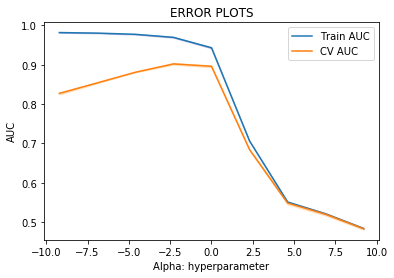

Best hyper parameter:  {'alpha': 0.1}
Model Score:  0.9020942049974332


In [40]:
# using Grid Search CV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

K=[.0001,.001,.01,.1,1,10,100,1000,10000]
m_nb = MultinomialNB()
parameters = {'alpha': K}
clf = GridSearchCV(m_nb, parameters, scoring='roc_auc')
clf.fit(X_tr_bow, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

log_my_data = [math.log(x) for x in K]

plt.plot(log_my_data, (train_auc), label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print('Best hyper parameter: ', clf.best_params_)
print('Model Score: ', clf.best_score_)

best_alpha= float(clf.best_params_['alpha'])

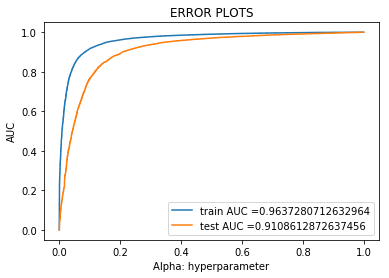

In [41]:
m_nb = MultinomialNB(alpha= .1)
m_nb.fit(X_tr_bow, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(Y_train, m_nb.predict_proba(X_tr_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, m_nb.predict_proba(x_ts_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [42]:
print('AUC: ',roc_auc_score(Y_train, m_nb.predict(X_tr_bow)))

AUC:  0.8910067805126624


Test confusion matrix
[[ 3380  1517]
 [ 1697 26406]]


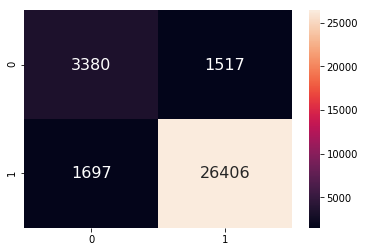

In [43]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, m_nb.predict(x_ts_bow)))

# confusion matrix visualization using seaborn heatmap 
df_test= pd.DataFrame(confusion_matrix(y_test, m_nb.predict(x_ts_bow)))
sns.heatmap(df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### [5.1.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [44]:
Y_train.value_counts()

1    57094
0     9906
Name: Score, dtype: int64

In [45]:
# Creating the model with our best alpha.
mnb_clf = MultinomialNB(alpha = 0.1)
mnb_clf.fit(X_tr_bow, Y_train)
 

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [46]:
# '''Get top 50 features displayed from both the negative and the positive review classes.'''
# Reference URL: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697
    
pos_class_prob_sorted = (-mnb_clf.feature_log_prob_[1, :]).argsort()
    
pos_class_features = np.take(count_vect.get_feature_names(), pos_class_prob_sorted[:10])
    
print("The top 10 most frequent words from the positive class are :\n")
print(pos_class_features)

del(pos_class_prob_sorted, pos_class_features)

The top 10 most frequent words from the positive class are :

['not' 'like' 'good' 'great' 'tea' 'one' 'taste' 'love' 'product' 'flavor']


### [5.1.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [47]:
# '''Get top 50 features displayed from both the negative and the positive review classes.'''
# Reference URL: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697
    
neg_class_prob_sorted = (-m_nb.feature_log_prob_[0, :]).argsort()
    
neg_class_features = np.take(count_vect.get_feature_names(), neg_class_prob_sorted[:10])
    
print("The top 10 most frequent words from the negative class are :\n")
print(neg_class_features)

del(neg_class_prob_sorted, neg_class_features)

The top 10 most frequent words from the negative class are :

['not' 'like' 'product' 'would' 'taste' 'one' 'no' 'good' 'tea' 'flavor']


## [5.2] Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [48]:
# importing libraries
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

## [4.3] TF-IDF

In [49]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
X_tr_tfidf= tf_idf_vect.fit_transform(X_train)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print(len(tf_idf_vect.get_feature_names()))
print('='*50)
print("the type of count vectorizer ",type(X_tr_tfidf))
print("the shape of out text TFIDF vectorizer ",X_tr_tfidf.get_shape())

x_ts_tfidf = tf_idf_vect.transform(x_test)
print("the type of count vectorizer ",type(x_ts_tfidf))
print("the shape of out text TFIDF vectorizer ",x_ts_tfidf.get_shape())

some sample features(unique words in the corpus) ['ab', 'abandoned', 'abc', 'abdominal', 'ability', 'able', 'able buy', 'able chew', 'able drink', 'able eat']
37910
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (67000, 37910)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (33000, 37910)


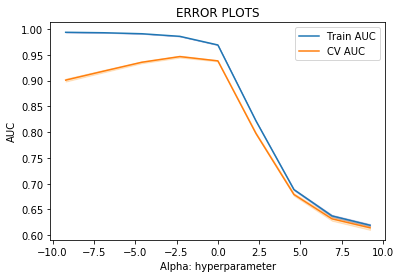

Best hyper parameter:  {'alpha': 0.1}
Model Score:  0.9464193364960128


In [50]:
# using Grid Search CV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

K=[.0001,.001,.01,.1,1,10,100,1000,10000]
m_nb = MultinomialNB()
parameters = {'alpha': K}
clf = GridSearchCV(m_nb, parameters, scoring='roc_auc')
clf.fit(X_tr_tfidf, Y_train)

log_my_data = [math.log(x) for x in K]

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print('Best hyper parameter: ', clf.best_params_)
print('Model Score: ', clf.best_score_)
best_alpha= float(clf.best_params_['alpha'])

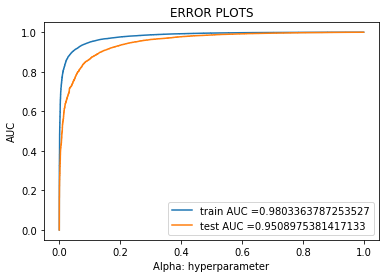

In [51]:
m_nb = MultinomialNB(alpha= best_alpha)
m_nb.fit(X_tr_tfidf, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(Y_train, m_nb.predict_proba(X_tr_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, m_nb.predict_proba(x_ts_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [52]:
print('AUC: ',roc_auc_score(Y_train, m_nb.predict(X_tr_tfidf)))

AUC:  0.8240341969266419


Test confusion matrix
[[ 2396  2501]
 [  365 27738]]


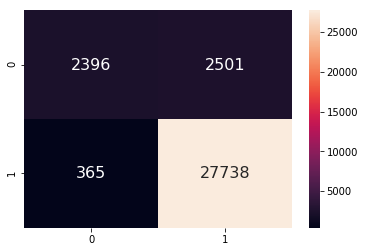

In [53]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, m_nb.predict(x_ts_tfidf)))

# conprint('AUC: ',roc_auc_score(Y_train, m_nb.predict(X_tr_bow)))fusion matrix visualization using seaborn heatmap 
df_test= pd.DataFrame(confusion_matrix(y_test, m_nb.predict(x_ts_tfidf)))
sns.heatmap(df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### [5.2.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [54]:
# Creating the model with our best alpha.
mnb_clf = MultinomialNB(alpha = 0.1)
mnb_clf.fit(X_tr_tfidf, Y_train)
 

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [55]:
# '''Get top 50 features displayed from both the negative and the positive review classes.'''
# Reference URL: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697
    
pos_class_prob_sorted = (-mnb_clf.feature_log_prob_[1, :]).argsort()
    
pos_class_features = np.take(tf_idf_vect.get_feature_names(), pos_class_prob_sorted[:10])
    
print("The top 10 most frequent words from the positive class are :\n")
print(pos_class_features)

del(pos_class_prob_sorted, pos_class_features)

The top 10 most frequent words from the positive class are :

['not' 'tea' 'great' 'good' 'like' 'love' 'product' 'one' 'taste' 'flavor']


### [5.2.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [56]:
# '''Get top 50 features displayed from both the negative and the positive review classes.'''
# Reference URL: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697
    
neg_class_prob_sorted = (-mnb_clf.feature_log_prob_[0, :]).argsort()
    
neg_class_features = np.take(tf_idf_vect.get_feature_names(), neg_class_prob_sorted[:10])
    
print("The top 10 most frequent words from the negative class are :\n")
print(neg_class_features)

del(neg_class_prob_sorted,  neg_class_features)

The top 10 most frequent words from the negative class are :

['not' 'like' 'product' 'would' 'taste' 'one' 'no' 'tea' 'flavor' 'good']


# [6] Conclusions

In [57]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter(Alpha)", "AUC", "Train(%)", "Test(%)"]

x.add_row(["BOW", 'MultinomialNB', .1, .90, 96, 90])
x.add_row(["TFIDF", 'MultinomialNB', .1, .82, 98, 95])

print(x,'\n')
print('It works best with alpha=0.1, Tfidf, multinomialNB')

+------------+---------------+------------------------+------+----------+---------+
| Vectorizer |     Model     | Hyper parameter(Alpha) | AUC  | Train(%) | Test(%) |
+------------+---------------+------------------------+------+----------+---------+
|    BOW     | MultinomialNB |          0.1           | 0.9  |    96    |    90   |
|   TFIDF    | MultinomialNB |          0.1           | 0.82 |    98    |    95   |
+------------+---------------+------------------------+------+----------+---------+ 

It works best with alpha=0.1, Tfidf, multinomialNB


# Feature engineering
    To increase the performance of your model, you can also experiment with with feature engineering like :
    Taking length of reviews as another feature.
    Considering to create a new feature i.e length and perform further calculation stuff using bow vectorizer

In [58]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
X_tr_bow= count_vect.fit_transform(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print(len(count_vect.get_feature_names()))
print('='*50)
print("the type of count vectorizer ",type(X_tr_bow))
print("the shape of out text BOW vectorizer ",X_tr_bow.get_shape())

x_ts_bow = count_vect.transform(x_test)
print("the type of count vectorizer ",type(x_ts_bow))
print("the shape of out text BOW vectorizer ",x_ts_bow.get_shape())

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaaaaaa', 'aaaaaahhhhhyaaaaaa', 'aaaaaand', 'aaaaah', 'aaaaawsome', 'aaaah']
49485
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (67000, 49485)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (33000, 49485)


In [59]:
elements_len_tr= []
for each in X_train:
    elements_len_tr.append(len(each))
    
elements_len_ts= []
for each in x_test:
    elements_len_ts.append(len(each))


In [61]:
# Ref.: https://stackoverflow.com/questions/41927781/adding-pandas-columns-to-a-sparse-matrix/41948136
from scipy.sparse import hstack
X_train_dtm = hstack((X_tr_bow,np.array(elements_len_tr)[:,None]))

X_test_dtm = hstack((x_ts_bow,np.array(elements_len_ts)[:,None]))

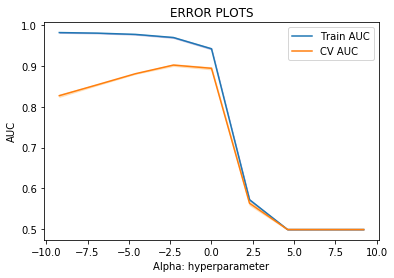

Best hyper parameter:  {'alpha': 0.1}
Model Score:  0.9020959502208566


In [62]:
# using Grid Search CV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

K=[.0001,.001,.01,.1,1,10,100,1000,10000]
m_nb = MultinomialNB()
parameters = {'alpha': K}
clf = GridSearchCV(m_nb, parameters, scoring='roc_auc')
clf.fit(X_train_dtm, Y_train)

log_my_data = [math.log(x) for x in K]

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print('Best hyper parameter: ', clf.best_params_)
print('Model Score: ', clf.best_score_)

best_alpha= float(clf.best_params_['alpha'])

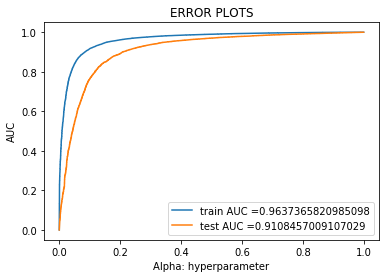

In [63]:
m_nb = MultinomialNB(alpha= best_alpha)
m_nb.fit(X_train_dtm, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(Y_train, m_nb.predict_proba(X_train_dtm)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, m_nb.predict_proba(X_test_dtm)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [64]:
print('AUC: ',roc_auc_score(Y_train, m_nb.predict(X_train_dtm)))

AUC:  0.8910309825096298


Test confusion matrix
[[ 3381  1516]
 [ 1694 26409]]


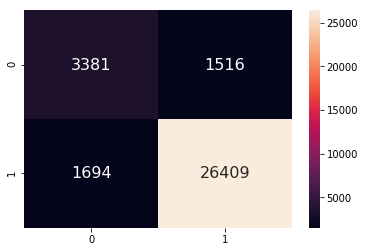

In [65]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, m_nb.predict(X_test_dtm)))

# confusion matrix visualization using seaborn heatmap 
df_test= pd.DataFrame(confusion_matrix(y_test, m_nb.predict(X_test_dtm)))
sns.heatmap(df_test, annot=True,annot_kws={"size": 16}, fmt='g')

##  TF-IDF

In [66]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
X_tr_tfidf= tf_idf_vect.fit_transform(X_train)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print(len(tf_idf_vect.get_feature_names()))
print('='*50)
print("the type of count vectorizer ",type(X_tr_tfidf))
print("the shape of out text TFIDF vectorizer ",X_tr_tfidf.get_shape())

x_ts_tfidf = tf_idf_vect.transform(x_test)
print("the type of count vectorizer ",type(x_ts_tfidf))
print("the shape of out text TFIDF vectorizer ",x_ts_tfidf.get_shape())

some sample features(unique words in the corpus) ['ab', 'abandoned', 'abc', 'abdominal', 'ability', 'able', 'able buy', 'able chew', 'able drink', 'able eat']
37910
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (67000, 37910)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (33000, 37910)


In [67]:
elements_len_tr= []
for each in X_train:
    elements_len_tr.append(len(each))
    
elements_len_ts= []
for each in x_test:
    elements_len_ts.append(len(each))


In [68]:
# Ref.: https://stackoverflow.com/questions/41927781/adding-pandas-columns-to-a-sparse-matrix/41948136
from scipy.sparse import hstack
X_train_dtm = hstack((X_tr_tfidf,np.array(elements_len_tr)[:,None]))

X_test_dtm = hstack((x_ts_tfidf,np.array(elements_len_ts)[:,None]))

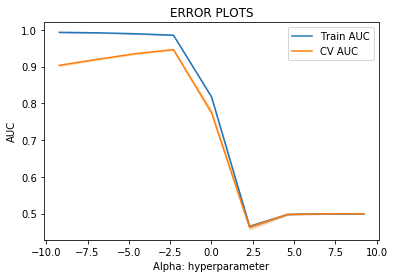

Best hyper parameter:  {'alpha': 0.1}
Model Score:  0.9460590268098563


In [69]:
# using Grid Search CV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

K=[.0001,.001,.01,.1,1,10,100,1000,10000]
m_nb = MultinomialNB()
parameters = {'alpha': K}
clf = GridSearchCV(m_nb, parameters, scoring='roc_auc')
clf.fit(X_train_dtm, Y_train)

log_my_data = [math.log(x) for x in K]

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print('Best hyper parameter: ', clf.best_params_)
print('Model Score: ', clf.best_score_)
best_alpha= float(clf.best_params_['alpha'])

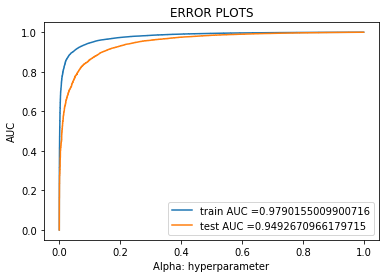

In [70]:
m_nb = MultinomialNB(alpha= best_alpha)
m_nb.fit(X_train_dtm, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(Y_train, m_nb.predict_proba(X_train_dtm)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, m_nb.predict_proba(X_test_dtm)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [71]:
print('AUC: ',roc_auc_score(Y_train, m_nb.predict(X_train_dtm)))

AUC:  0.823398397665134


Test confusion matrix
[[ 2421  2476]
 [  424 27679]]


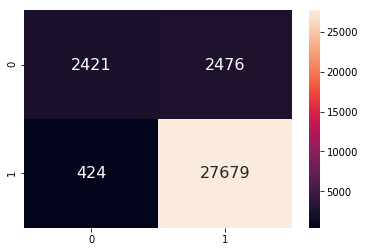

In [72]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, m_nb.predict(X_test_dtm)))

# confusion matrix visualization using seaborn heatmap 
df_test= pd.DataFrame(confusion_matrix(y_test, m_nb.predict(X_test_dtm)))
sns.heatmap(df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## Conclude: Feature engineering 


In [73]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter(Alpha)", "AUC", "Train(%)", "Test(%)"]

x.add_row(["BOW", 'MultinomialNB', .1, .90, 96, 91])
x.add_row(["TFIDF", 'MultinomialNB', .1, .94, 98, 95])

print(x,'\n')
print('It works best with alpha=0.1, Tfidf, multinomialNB')

+------------+---------------+------------------------+------+----------+---------+
| Vectorizer |     Model     | Hyper parameter(Alpha) | AUC  | Train(%) | Test(%) |
+------------+---------------+------------------------+------+----------+---------+
|    BOW     | MultinomialNB |          0.1           | 0.9  |    96    |    91   |
|   TFIDF    | MultinomialNB |          0.1           | 0.94 |    98    |    95   |
+------------+---------------+------------------------+------+----------+---------+ 

It works best with alpha=0.1, Tfidf, multinomialNB
